# Natural Frequencies
# 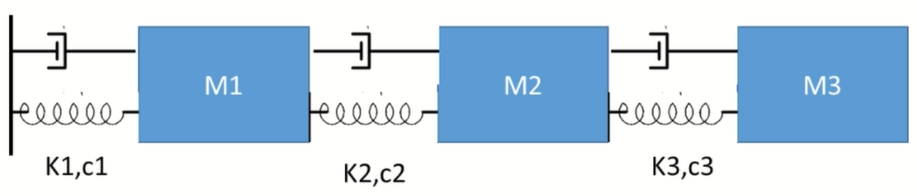

## Eigen Value |[K| - [M]w²| = 0

In [29]:
import numpy as np
from scipy import linalg

m1,m2,m3 = 5,5,5
k1,k2,k3 = 1200,1300,1000

M = np.array([[m1,0,0],
              [0,m2,0],
              [0,0,m3]])
K = np.array([[k1+k2,-k2,   0],
              [-k2,k2+k3,-k3],
              [0,    -k3,  k3]])
# Eigen values

u,v = linalg.eigh(K,M)

#print(u) # eigen value
#print(v) # eigen vector

Wn = np.sqrt(u)
print("First Natural Frequency:", Wn[0])
print("Second Natural Frequency:", Wn[1])
print("Third Natural Frequency:", Wn[2])

First Natural Frequency: 6.911306246551372
Second Natural Frequency: 18.358744474487903
Third Natural Frequency: 27.842240342451603


# Frequency Response - MDOF
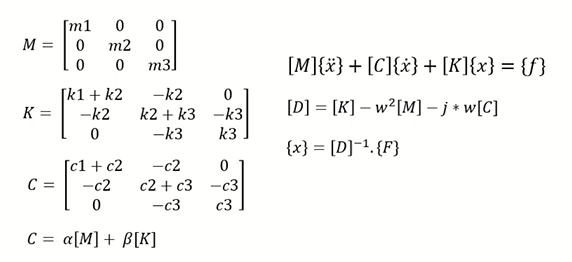

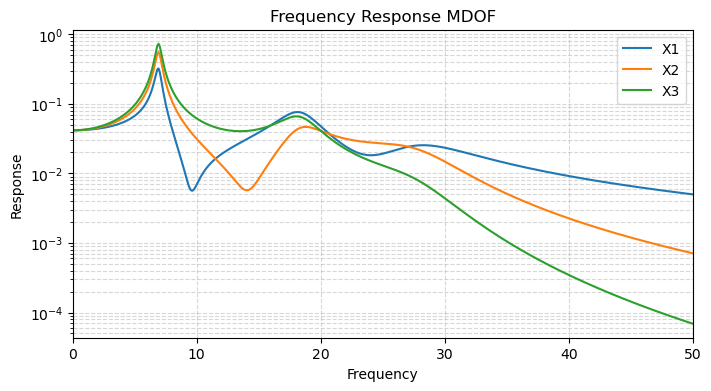

In [35]:
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt
import cmath

m1,m2,m3 = 5,5,5
k1,k2,k3 = 1200,1300,1000

w = np.linspace(0,50,500)
alpha = 0.01
beta = 0.01

real = 0
img = 1

i = complex(real, img)
W = []
X1 = []
X2 = []
X3 = []

for f in w:
    M = np.array([[m1,0,0],
              [0,m2,0],
              [0,0,m3]])
    K = np.array([[k1+k2,-k2,  0],
                  [-k2,k2+k3,-k3],
                  [0,    -k3, k3]])
    
    C = (alpha*M) + (beta*K)
    
    Force = np.array([[50],
                      [0],
                      [0]])
    
    D = K - (f**2*M)-(i*f*C)
    
    x = linalg.inv(D).dot(Force)
    X1.append(abs(x[0]))
    X2.append(abs(x[1]))
    X3.append(abs(x[2]))
    W.append(f)

plt.figure(figsize=(8,4))
plt.plot(W,X1,label='X1')
plt.plot(W,X2,label='X2')
plt.plot(W,X3,label='X3')

plt.xlim(W[0], W[-1])
plt.yscale('log')
plt.grid(which='both',linestyle='--', alpha=0.5)
plt.legend()
plt.title('Frequency Response MDOF')
plt.xlabel('Frequency')
plt.ylabel('Response')

plt.show()

In [13]:
x = 1
y = 2
z = complex(x,y)
z

(1+2j)